- 탐색적 데이터 분석
- 데이터 정제
- Scaling
- 결측치 제거
- 아웃라이어 탐지/판단
- 정규성 검증/데이터 변환


## You are required to help the manager to predict the right group of the new customers.
- ID =	Unique ID
- Gender	= Gender of the customer
- Ever_Married	 Marital status of the customer
- Age	 =Age of the customer
- Graduated	Is the customer a graduate?
- Profession	=Profession of the customer
- Work_Experience	=Work Experience in years
- Spending_Score	=Spending score of the customer
- Family_Size	=Number of family members for the customer (including the customer)
- Var_1	=Anonymised Category for the customer
- Segmentation	=(target) Customer Segment of the customer

## 1. 탐색적 데이터 분석 

In [4]:
import pandas as pd
import numpy as np

In [5]:
train_customer = pd.read_csv('Train.csv')

In [7]:
train_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [430]:
train_customer['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [8]:
train_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
train_customer.shape

(8068, 11)

In [10]:
#특정 type 열만 고르기 
train_customer.select_dtypes(include=['object']).head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A


In [11]:
train_customer.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [12]:
train_customer.describe(include = [np.number], #inger와 float 타입의 수치열 다 포함 
percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
ID,8068.0,463479.214551,2595.381232,458982.0,459070.67,459438.35,459880.7,461240.75,463472.5,465744.25,467075.3,467521.65,467879.33,467974.0
Age,8068.0,43.466906,16.711696,18.0,18.00,21.00,25.0,30.00,40.0,53.00,69.0,77.00,87.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,0.00,0.0,0.00,1.0,4.00,8.0,9.00,13.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,1.00,1.00,1.0,2.00,3.0,4.00,5.0,6.00,8.00,9.0


In [13]:
train_customer.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,7928,2,Yes,4643
Graduated,7990,2,Yes,4968
Profession,7944,9,Artist,2516
Spending_Score,8068,3,Low,4878
Var_1,7992,7,Cat_6,5238
Segmentation,8068,4,D,2268


In [14]:
#include = 'all' 은 문자열 데이터까지도 고유값 개수, 최빈값, 빈도수를 나타낸다. 
train_customer.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [15]:
#나이가 가장 많이 나가는 10개만 일경험이 가장 적은 10개 추출 
train_customer.nlargest(10,'Age').nsmallest(10,'Work_Experience')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1108,467952,Female,Yes,89,Yes,Lawyer,0.0,High,2.0,Cat_6,C
1213,467551,Female,Yes,89,No,Lawyer,0.0,High,2.0,Cat_6,B
2488,466725,Female,Yes,89,No,Lawyer,0.0,High,2.0,Cat_6,A
2539,463316,Female,Yes,89,No,Lawyer,0.0,High,2.0,Cat_6,A
1661,459529,Female,Yes,89,No,Lawyer,1.0,High,2.0,Cat_6,A
3068,460906,Female,Yes,89,Yes,Lawyer,1.0,High,3.0,Cat_6,A
395,462149,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
1642,459603,Female,Yes,89,No,Lawyer,3.0,High,2.0,Cat_6,A
321,467714,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A


In [16]:
#순서 정렬
train_customer.sort_values(['Age','Work_Experience'], ascending =False)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
321,467714,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
5791,464428,Female,Yes,89,Yes,Entertainment,6.0,Average,4.0,Cat_2,A
395,462149,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
1642,459603,Female,Yes,89,No,Lawyer,3.0,High,2.0,Cat_6,A
3526,462173,Male,Yes,89,Yes,Executive,3.0,Low,3.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
5857,459659,Female,NaN,18,No,Healthcare,NaN,Low,3.0,Cat_6,D
6013,459712,Male,No,18,No,Healthcare,NaN,Low,4.0,Cat_6,D
6527,461110,Male,No,18,No,Healthcare,NaN,Low,3.0,Cat_3,D
6531,463590,Male,No,18,No,Healthcare,NaN,Low,3.0,Cat_4,D


In [17]:
#데이터의 열마다 개수를 시리즈 형태로 반환 
train_customer.count()

ID                 8068
Gender             8068
Ever_Married       7928
Age                8068
Graduated          7990
Profession         7944
Work_Experience    7239
Spending_Score     8068
Family_Size        7733
Var_1              7992
Segmentation       8068
dtype: int64

In [18]:
#특정 열의 고유값 개수를 다시 시리즈형태로 반환 
train_customer['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [19]:
print(train_customer.mean())

ID                 463479.214551
Age                    43.466906
Work_Experience         2.641663
Family_Size             2.850123
dtype: float64


In [431]:
train_customer.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [432]:
train_customer['Age'].value_counts()

35    250
37    234
42    232
33    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

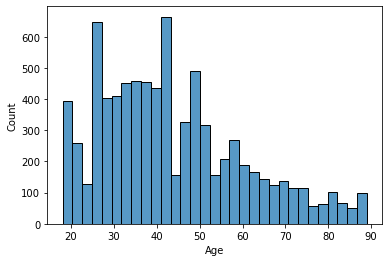

In [433]:
sns.histplot(data = train_customer, x='Age')

## 데이터 정제 및 결측치 제거



In [74]:
#데이터 프래임의 인덱스를 바꿔줌 
stacked = train_customer[:1].stack()
stacked

0  ID                     462809
   Gender                   Male
   Ever_Married               No
   Age                        22
   Graduated                  No
   Profession         Healthcare
   Work_Experience           1.0
   Spending_Score            Low
   Family_Size               4.0
   Var_1                   Cat_4
   Segmentation                D
dtype: object

In [83]:
#데이터 중복 제거하기 
train_dup = train_customer.duplicated()
train_dup
train_dup = train_customer.drop_duplicates()
print(train_dup) #중복값이 없음 
print('데이터 중복 삭제 갯수')
print(len(train_customer)-len(train_dup))

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4            D  
1                 NaN        Average          3.0  

In [84]:
#결측치 처리 
train_dup.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [85]:
#결측치 제거 [Profession]
train_dup = train_dup.dropna(thresh=9)

#특정칼럼 기준으로 결측치 처리 
train_dup = train_dup.dropna(subset=['Profession', 'Ever_Married','Graduated','Var_1'])
train_dup

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [86]:
train_dup.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    764
Spending_Score       0
Family_Size        293
Var_1                0
Segmentation         0
dtype: int64

In [87]:
train_dup['Family_Size'].value_counts()

2.0    2294
3.0    1427
1.0    1379
4.0    1320
5.0     573
6.0     203
7.0      91
8.0      47
9.0      42
Name: Family_Size, dtype: int64

In [88]:
#결측값 보기
train_dup.loc[train_dup['Work_Experience'].isnull()] 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Cat_6,A
39,467442,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6,C
45,463156,Female,Yes,79,No,Lawyer,NaN,High,2.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8020,465278,Male,Yes,38,No,Marketing,NaN,High,4.0,Cat_7,C
8029,462516,Female,No,28,No,Engineer,NaN,Low,3.0,Cat_6,D
8040,467165,Female,No,25,No,Homemaker,NaN,Low,1.0,Cat_6,D
8047,462396,Male,Yes,50,Yes,Doctor,NaN,Average,2.0,Cat_6,C


In [89]:
#결측값 채우기  == fillna 'No'
train_dup['Work_Experience'] = train_dup['Work_Experience'].fillna(0.0)

In [90]:
train_dup['Ever_Married'][train_dup['Family_Size'].isnull()].value_counts()

No     171
Yes    122
Name: Ever_Married, dtype: int64

In [91]:
#특정 값에 결측치 넣기
train_dup['Family_Size'][train_dup['Ever_Married']=='No'].value_counts()

1.0    832
3.0    615
4.0    589
2.0    439
5.0    302
6.0    117
7.0     56
8.0     35
9.0     21
Name: Family_Size, dtype: int64

- Work_Experience 경우, 각 직업의 평균 값으로 대체하기 

In [97]:
#결측치 dropna 하기 
train_dup = train_dup.dropna(subset=['Family_Size'])
train_dup['Family_Size'].value_counts()


2.0    2294
3.0    1427
1.0    1379
4.0    1320
5.0     573
6.0     203
7.0      91
8.0      47
9.0      42
Name: Family_Size, dtype: int64

In [99]:
#결측치 처리완료! 
print(train_dup.isnull().sum())
print(train_dup.info())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7376 non-null   int64  
 1   Gender           7376 non-null   object 
 2   Ever_Married     7376 non-null   object 
 3   Age              7376 non-null   int64  
 4   Graduated        7376 non-null   object 
 5   Profession       7376 non-null   object 
 6   Work_Experience  7376 non-null   float64
 7   Spending_Score   7376 non-null   object 
 8   Family_Size      7376 non-null   float64
 9   Var_1            7376 non-null   object 
 10  Segmentation     7376 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usag

## scaling
- 표준화(Standardization)

In [273]:
train_scaling = train_dup
train_scaling=train_scaling[['Age','Work_Experience','Family_Size']]

In [274]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler = scaler.fit_transform(train_scaling)
train_scaled = pd.DataFrame(scaler, columns = ['Age','Work_Experience','Family_Size'])
train_scaled

,Age,Work_Experience,Family_Size
0,-1.295775,-0.413298,0.754384
1,-0.332910,-0.713730,0.099910
2,1.412282,-0.413298,-1.209038
3,1.412282,-0.713730,-0.554564
4,-0.212552,-0.713730,2.063333
...,...,...,...
7371,-0.152373,-0.713730,1.408859
7372,-0.513447,0.187566,0.754384
7373,-0.633805,-0.413298,-1.209038
7374,-0.994879,-0.413298,0.754384


In [161]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

scaler = scaler.fit_transform(train_scaling)
train_scaled_robust = pd.DataFrame(scaler, columns = ['Age','Work_Experience','Family_Size'])
train_scaled_robust.head()

,Age,Work_Experience,Family_Size
0,-0.863636,0.00,0.5
1,-0.136364,-0.25,0.0
2,1.181818,0.00,-1.0
3,1.181818,-0.25,-0.5
4,-0.045455,-0.25,1.5


In [256]:
train_scaled.tail()

,Age,Work_Experience,Family_Size
7371,-0.152373,-0.713730,1.408859
7372,-0.513447,0.187566,0.754384
7373,-0.633805,-0.413298,-1.209038
7374,-0.994879,-0.413298,0.754384
7375,-0.393089,-0.713730,0.099910


## 아웃라이어 탐지/판단

In [276]:
#인덱스 맟춰주기 
train_dup= train_dup.reset_index()

In [279]:
scaled_table = train_scaled_robust
scaled_table_2= train_dup[['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score','Var_1','Segmentation']]
train_outlier= pd.concat([scaled_table_2 , scaled_table], axis=1)
train_outlier

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,Male,No,No,Healthcare,Low,Cat_4,D,-0.863636,0.00,0.5
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,-0.136364,-0.25,0.0
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,1.181818,0.00,-1.0
3,Male,Yes,Yes,Lawyer,High,Cat_6,B,1.181818,-0.25,-0.5
4,Female,Yes,Yes,Entertainment,High,Cat_6,A,-0.045455,-0.25,1.5
...,...,...,...,...,...,...,...,...,...,...
7371,Male,Yes,Yes,Artist,High,Cat_6,B,0.000000,-0.25,1.0
7372,Male,No,No,Executive,Low,Cat_4,D,-0.272727,0.50,0.5
7373,Female,No,Yes,Healthcare,Low,Cat_6,D,-0.363636,0.00,-1.0
7374,Female,No,Yes,Healthcare,Low,Cat_6,B,-0.636364,0.00,0.5


In [280]:
def outlier_iqr(data, column):
    
 # lower, upper 글로벌 변수 선언하기 
    global lower, upper 

    # 4분위수 기준 지정하기 
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75) 

    # IQR 계산하기 
    iqr = q75 - q25 

    # outlier cutoff 계산하기 
    cut_off = iqr * 1.5 

    # lower와 upper bound 값 구하기 
    lower, upper = q25 - cut_off, q75 + cut_off 

    print('IQR은',iqr, '이다.') 
    print('lower bound 값은', lower, '이다.') 
    print('upper bound 값은', upper, '이다.') 

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기 
    data1 = data[data[column] > upper] 
    data2 = data[data[column] < lower] 

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [281]:
outlier_iqr(train_outlier,'Work_Experience')

IQR은 1.0 이다.
lower bound 값은 -1.75 이다.
upper bound 값은 2.25 이다.
총 이상치 개수는 176 이다.


{'whiskers': [<matplotlib.lines.Line2D at 0x172ff606ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x172ff584250>,
 'boxes': [<matplotlib.lines.Line2D at 0x172ff75cf70>],
 'medians': [<matplotlib.lines.Line2D at 0x172ff5b4250>],
 'fliers': [<matplotlib.lines.Line2D at 0x172ff5b4a30>],
 'means': []}

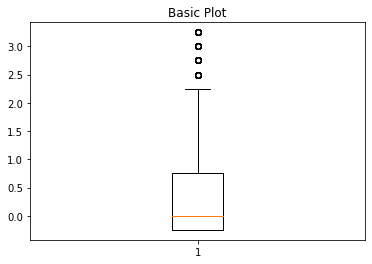

In [282]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(train_outlier['Work_Experience'])

In [283]:
train_outlier.loc[(train_outlier['Work_Experience'] < upper) &  (train_outlier['Work_Experience'] > lower) ]
    

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,Male,No,No,Healthcare,Low,Cat_4,D,-0.863636,0.00,0.5
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,-0.136364,-0.25,0.0
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,1.181818,0.00,-1.0
3,Male,Yes,Yes,Lawyer,High,Cat_6,B,1.181818,-0.25,-0.5
4,Female,Yes,Yes,Entertainment,High,Cat_6,A,-0.045455,-0.25,1.5
...,...,...,...,...,...,...,...,...,...,...
7371,Male,Yes,Yes,Artist,High,Cat_6,B,0.000000,-0.25,1.0
7372,Male,No,No,Executive,Low,Cat_4,D,-0.272727,0.50,0.5
7373,Female,No,Yes,Healthcare,Low,Cat_6,D,-0.363636,0.00,-1.0
7374,Female,No,Yes,Healthcare,Low,Cat_6,B,-0.636364,0.00,0.5


In [284]:
#이상치 제거하기
train_outlier_drop = train_outlier[(train_outlier['Work_Experience'] < upper) & (train_outlier['Work_Experience'] > lower)]
len(train_outlier_drop)
train_outlier_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 0 to 7375
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7149 non-null   object 
 1   Ever_Married     7149 non-null   object 
 2   Graduated        7149 non-null   object 
 3   Profession       7149 non-null   object 
 4   Spending_Score   7149 non-null   object 
 5   Var_1            7149 non-null   object 
 6   Segmentation     7149 non-null   object 
 7   Age              7149 non-null   float64
 8   Work_Experience  7149 non-null   float64
 9   Family_Size      7149 non-null   float64
dtypes: float64(3), object(7)
memory usage: 614.4+ KB


<AxesSubplot:xlabel='Work_Experience'>

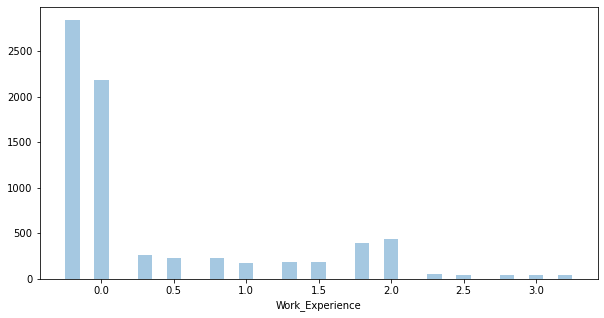

In [285]:
# 이상치 영역을 displot으로 시각화
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


warnings.filterwarnings(action='ignore')
plt.figure(figsize=(10,5))

sns.distplot(train_outlier['Work_Experience'], kde=False)
# 이상치 영역 박스 그리기
# plt.axvspan(xmin=lower, xmax=(train_outlier.Work_Experience.min() ) #, alpha=0.2, color='red')
# plt.axvspan(xmin=upper, xmax=(train_outlier.Work_Experience.max() ) #, alpha=0.2, color='red')

In [286]:
outlier_iqr(train_outlier,'Family_Size')

IQR은 1.0 이다.
lower bound 값은 -2.0 이다.
upper bound 값은 2.0 이다.
총 이상치 개수는 89 이다.


<AxesSubplot:xlabel='Family_Size'>

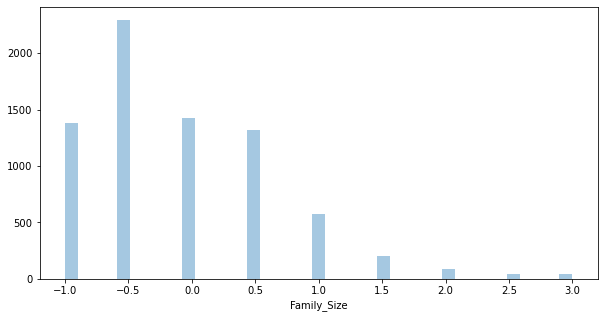

In [287]:
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(10,5))

sns.distplot(train_outlier['Family_Size'], kde=False)
# 이상치 영역 박스 그리기
# plt.axvspan(xmin=lower, xmax=(train_outlier.Work_Experience.min() ) #, alpha=0.2, color='red')
# plt.axvspan(xmin=upper, xmax=(train_outlier.Work_Experience.max() ) #, alpha=0.2, color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x172ffe1b490>,
 'caps': [<matplotlib.lines.Line2D at 0x172ffddad30>,
 'boxes': [<matplotlib.lines.Line2D at 0x172ffc76220>],
 'medians': [<matplotlib.lines.Line2D at 0x172ffd79a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x172849a5f40>],
 'means': []}

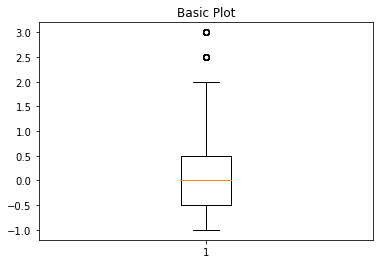

In [288]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(train_outlier['Family_Size'])

In [289]:
#이상치 제거하기 
train_outlier_drop_2 = train_outlier_drop[(train_outlier_drop['Family_Size'] < upper) & (train_outlier_drop['Family_Size'] > lower)]
print(len(train_outlier_drop_2))

6976


In [290]:
train_outlier_drop_2.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,Male,No,No,Healthcare,Low,Cat_4,D,-0.863636,0.00,0.5
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,-0.136364,-0.25,0.0
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,1.181818,0.00,-1.0
3,Male,Yes,Yes,Lawyer,High,Cat_6,B,1.181818,-0.25,-0.5
4,Female,Yes,Yes,Entertainment,High,Cat_6,A,-0.045455,-0.25,1.5


## 상관계수 구하기

In [291]:
#상관계수 : corr()
train_outlier_drop_2.corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.159536,-0.290803
Work_Experience,-0.159536,1.000000,-0.059080
Family_Size,-0.290803,-0.059080,1.000000


In [292]:
#두변수만 지정해서 상관계수 구하기
print(train_outlier_drop_2[['Age','Family_Size']].corr())


                  Age  Family_Size
Age          1.000000    -0.290803
Family_Size -0.290803     1.000000


<AxesSubplot:xlabel='Age'>

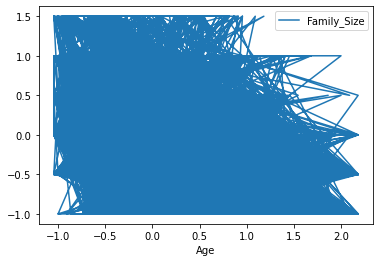

In [293]:
#상관계수가 가장 높았던, 나이와 Family_Size 상관계수 시각화 하기 
train_outlier_drop_2.plot('Age','Family_Size')

<AxesSubplot:>

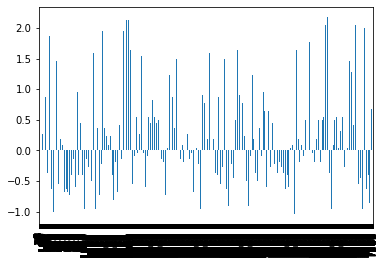

In [202]:
train_outlier_drop_2.Age.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

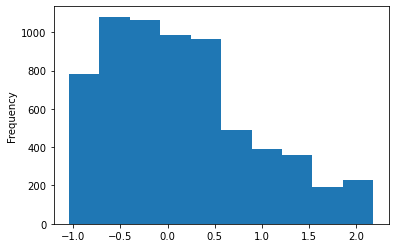

In [203]:
train_outlier_drop_2.Age.plot(kind='hist')

## encoding
- 범주형 변수와 연속형 변수를 각각 encoding_column 리스트에 넣기

In [294]:
train_encoding = train_outlier_drop_2
train_encoding

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size
0,Male,No,No,Healthcare,Low,Cat_4,D,-0.863636,0.00,0.5
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,-0.136364,-0.25,0.0
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,1.181818,0.00,-1.0
3,Male,Yes,Yes,Lawyer,High,Cat_6,B,1.181818,-0.25,-0.5
4,Female,Yes,Yes,Entertainment,High,Cat_6,A,-0.045455,-0.25,1.5
...,...,...,...,...,...,...,...,...,...,...
7371,Male,Yes,Yes,Artist,High,Cat_6,B,0.000000,-0.25,1.0
7372,Male,No,No,Executive,Low,Cat_4,D,-0.272727,0.50,0.5
7373,Female,No,Yes,Healthcare,Low,Cat_6,D,-0.363636,0.00,-1.0
7374,Female,No,Yes,Healthcare,Low,Cat_6,B,-0.636364,0.00,0.5


In [208]:
train_dup.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [295]:
lable_encoding_columns=['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score']
one_hot_encoding_columns= ['Var_1','Segmentation']
not_encoding_columns =['Age', 'Work_Experience','Family_Size']

In [296]:
from sklearn.preprocessing import LabelEncoder

enc_classes = {}
def encoding_label(x): # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_ # x.name: 컬럼명
    return label

In [297]:
#결측치가 있을 경우에, apply 적용이 불가하다.
lable_table =train_encoding[lable_encoding_columns].apply(encoding_label)
lable_table 

,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,1,0,0,5,2
1,0,1,1,2,0
2,0,1,1,2,2
3,1,1,1,7,1
4,0,1,1,3,1
...,...,...,...,...,...
7371,1,1,1,0,1
7372,1,0,0,4,2
7373,0,0,1,5,2
7374,0,0,1,5,2


In [298]:
#원핫인코딩 
one_hot_table = pd.get_dummies(train_encoding[one_hot_encoding_columns], drop_first=True)
one_hot_table

,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_B,Segmentation_C,Segmentation_D
0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7371,0,0,0,0,1,0,1,0,0
7372,0,0,1,0,0,0,0,0,1
7373,0,0,0,0,1,0,0,0,1
7374,0,0,0,0,1,0,1,0,0


In [377]:
#전체 인코딩 

encoding_columns=['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score','Var_1','Segmentation']
def encoding_code(x) : 
    train_outlier_drop_2[x].value_counts()
    train_outlier_drop_2[x] = train_outlier_drop_2[x].astype('category')
    train_outlier_drop_2[x+'_code'] = train_outlier_drop_2[x].cat.codes
    return train_outlier_drop_2[x+'_code']

# code= pd.DataFrame()
for i in encoding_columns:
    a = encoding_code(i)
#     code = pd.DataFrame(a)
    train_outlier_drop_2.append(a)
train_outlier_drop_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7375
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               6976 non-null   category
 1   Ever_Married         6976 non-null   category
 2   Graduated            6976 non-null   category
 3   Profession           6976 non-null   category
 4   Spending_Score       6976 non-null   category
 5   Var_1                6976 non-null   category
 6   Segmentation         6976 non-null   category
 7   Age                  6976 non-null   float64 
 8   Work_Experience      6976 non-null   float64 
 9   Family_Size          6976 non-null   float64 
 10  Gender_code          6976 non-null   int8    
 11  Ever_Married_code    6976 non-null   int8    
 12  Graduated_code       6976 non-null   int8    
 13  Profession_code      6976 non-null   int8    
 14  Spending_Score_code  6976 non-null   int8    
 15  Var_1_code           

In [382]:
pd.DataFrame(train_outlier_drop_2)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age,Work_Experience,Family_Size,Gender_code,Ever_Married_code,Graduated_code,Profession_code,Spending_Score_code,Var_1_code,Segmentation_code
0,Male,No,No,Healthcare,Low,Cat_4,D,-0.863636,0.00,0.5,1,0,0,5,2,3,3
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,-0.136364,-0.25,0.0,0,1,1,2,0,3,0
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,1.181818,0.00,-1.0,0,1,1,2,2,5,1
3,Male,Yes,Yes,Lawyer,High,Cat_6,B,1.181818,-0.25,-0.5,1,1,1,7,1,5,1
4,Female,Yes,Yes,Entertainment,High,Cat_6,A,-0.045455,-0.25,1.5,0,1,1,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,Male,Yes,Yes,Artist,High,Cat_6,B,0.000000,-0.25,1.0,1,1,1,0,1,5,1
7372,Male,No,No,Executive,Low,Cat_4,D,-0.272727,0.50,0.5,1,0,0,4,2,3,3
7373,Female,No,Yes,Healthcare,Low,Cat_6,D,-0.363636,0.00,-1.0,0,0,1,5,2,5,3
7374,Female,No,Yes,Healthcare,Low,Cat_6,B,-0.636364,0.00,0.5,0,0,1,5,2,5,1


In [383]:
train_all = train_outlier_drop_2[[ 'Gender_code', 'Ever_Married_code',
       'Graduated_code', 'Profession_code', 'Spending_Score_code',
       'Var_1_code', 'Segmentation_code']]


In [299]:
final_df = pd.concat([lable_table, one_hot_table ,train_outlier_drop_2[not_encoding_columns]],axis=1)
final_df

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_B,Segmentation_C,Segmentation_D,Age,Work_Experience,Family_Size
0,1,0,0,5,2,0,0,1,0,0,0,0,0,1,-0.863636,0.00,0.5
1,0,1,1,2,0,0,0,1,0,0,0,0,0,0,-0.136364,-0.25,0.0
2,0,1,1,2,2,0,0,0,0,1,0,1,0,0,1.181818,0.00,-1.0
3,1,1,1,7,1,0,0,0,0,1,0,1,0,0,1.181818,-0.25,-0.5
4,0,1,1,3,1,0,0,0,0,1,0,0,0,0,-0.045455,-0.25,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0.000000,-0.25,1.0
7372,1,0,0,4,2,0,0,1,0,0,0,0,0,1,-0.272727,0.50,0.5
7373,0,0,1,5,2,0,0,0,0,1,0,0,0,1,-0.363636,0.00,-1.0
7374,0,0,1,5,2,0,0,0,0,1,0,1,0,0,-0.636364,0.00,0.5


In [387]:
final_df2 = pd.concat([train_all ,train_outlier_drop_2[not_encoding_columns]],axis=1)
final_df2

,Gender_code,Ever_Married_code,Graduated_code,Profession_code,Spending_Score_code,Var_1_code,Segmentation_code,Age,Work_Experience,Family_Size
0,1,0,0,5,2,3,3,-0.863636,0.00,0.5
1,0,1,1,2,0,3,0,-0.136364,-0.25,0.0
2,0,1,1,2,2,5,1,1.181818,0.00,-1.0
3,1,1,1,7,1,5,1,1.181818,-0.25,-0.5
4,0,1,1,3,1,5,0,-0.045455,-0.25,1.5
...,...,...,...,...,...,...,...,...,...,...
7371,1,1,1,0,1,5,1,0.000000,-0.25,1.0
7372,1,0,0,4,2,3,3,-0.272727,0.50,0.5
7373,0,0,1,5,2,5,3,-0.363636,0.00,-1.0
7374,0,0,1,5,2,5,1,-0.636364,0.00,0.5


In [388]:
final_df2.isnull().sum()

Gender_code            0
Ever_Married_code      0
Graduated_code         0
Profession_code        0
Spending_Score_code    0
Var_1_code             0
Segmentation_code      0
Age                    0
Work_Experience        0
Family_Size            0
dtype: int64

## 정규성 검증/데이터 변환
- 연속성 변수의 경우에만 정규성 검증이 의의가 있다. 결정계수가 0.6 이상만 되어도 나름의미가 있다. 


In [300]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7375
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6976 non-null   int32  
 1   Ever_Married     6976 non-null   int32  
 2   Graduated        6976 non-null   int32  
 3   Profession       6976 non-null   int32  
 4   Spending_Score   6976 non-null   int32  
 5   Var_1_Cat_2      6976 non-null   uint8  
 6   Var_1_Cat_3      6976 non-null   uint8  
 7   Var_1_Cat_4      6976 non-null   uint8  
 8   Var_1_Cat_5      6976 non-null   uint8  
 9   Var_1_Cat_6      6976 non-null   uint8  
 10  Var_1_Cat_7      6976 non-null   uint8  
 11  Segmentation_B   6976 non-null   uint8  
 12  Segmentation_C   6976 non-null   uint8  
 13  Segmentation_D   6976 non-null   uint8  
 14  Age              6976 non-null   float64
 15  Work_Experience  6976 non-null   float64
 16  Family_Size      6976 non-null   float64
dtypes: float64(3),

In [302]:
final_df.columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Segmentation_B', 'Segmentation_C',
       'Segmentation_D', 'Age', 'Work_Experience', 'Family_Size'],
      dtype='object')

In [317]:
continue_table = final_df[[ 'Age', 'Work_Experience', 'Family_Size']]

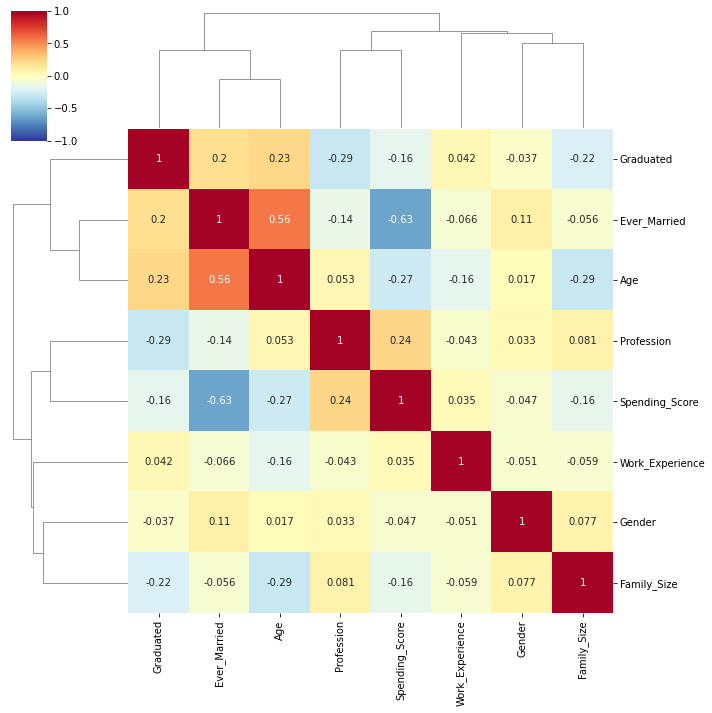

In [305]:
#상관관계 시각화
df = label_table.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [ ]:
# pip install pingouin
# T-test
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T
# T-test
pg.ttest(x, y)

In [314]:
label_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7375
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6976 non-null   int32  
 1   Ever_Married     6976 non-null   int32  
 2   Graduated        6976 non-null   int32  
 3   Profession       6976 non-null   int32  
 4   Spending_Score   6976 non-null   int32  
 5   Age              6976 non-null   float64
 6   Work_Experience  6976 non-null   float64
 7   Family_Size      6976 non-null   float64
dtypes: float64(3), int32(5)
memory usage: 354.2 KB


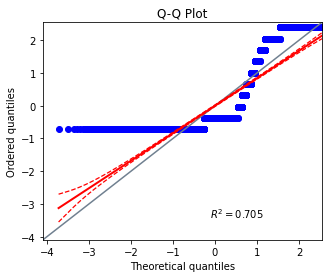

In [324]:
#전체 정규성 검증 
import numpy as np
import pingouin as pg

ax = pg.qqplot(continue_table.Work_Experience, dist='norm')

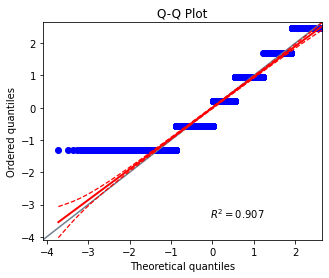

In [325]:
#전체 정규성 검증 
import numpy as np
import pingouin as pg

ax = pg.qqplot(continue_table.Family_Size, dist='norm')

In [1]:
#전체 정규성 검증 
import numpy as np
import pingouin as pg

ax = pg.qqplot(continue_table.Age, dist='norm')

NameError: name 'continue_table' is not defined

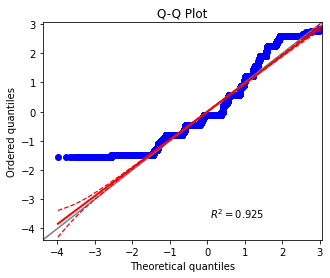

In [318]:
#전체 정규성 검증 
import numpy as np
import pingouin as pg

ax = pg.qqplot(continue_table, dist='norm')

<AxesSubplot:ylabel='Count'>

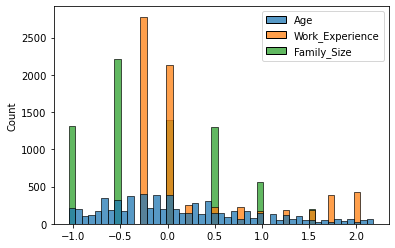

In [320]:
sns.histplot(continue_table)

Text(0.5, 1.0, 'Distance')

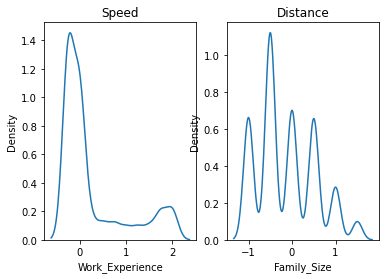

In [321]:
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(continue_table['Work_Experience'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(continue_table['Family_Size'], ax=ax2)
ax2.set_title('Distance')

In [322]:
#왜도 측정 
import scipy.stats

scipy.stats.skew(continue_table['Family_Size'])

0.5003848144640793

## 예측

In [389]:
final_df2.columns

Index(['Gender_code', 'Ever_Married_code', 'Graduated_code', 'Profession_code',
       'Spending_Score_code', 'Var_1_code', 'Segmentation_code', 'Age',
       'Work_Experience', 'Family_Size'],
      dtype='object')

In [390]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7375
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender_code          6976 non-null   int8   
 1   Ever_Married_code    6976 non-null   int8   
 2   Graduated_code       6976 non-null   int8   
 3   Profession_code      6976 non-null   int8   
 4   Spending_Score_code  6976 non-null   int8   
 5   Var_1_code           6976 non-null   int8   
 6   Segmentation_code    6976 non-null   int8   
 7   Age                  6976 non-null   float64
 8   Work_Experience      6976 non-null   float64
 9   Family_Size          6976 non-null   float64
dtypes: float64(3), int8(7)
memory usage: 523.7 KB


In [391]:
final_df2.isnull().sum()

Gender_code            0
Ever_Married_code      0
Graduated_code         0
Profession_code        0
Spending_Score_code    0
Var_1_code             0
Segmentation_code      0
Age                    0
Work_Experience        0
Family_Size            0
dtype: int64

In [392]:
data_x = final_df2.loc[:, ['Gender_code', 'Ever_Married_code', 'Graduated_code', 'Profession_code',
       'Spending_Score_code', 'Age',
       'Work_Experience', 'Family_Size']]
data_y = final_df2.loc[:, 'Segmentation_code' ]

In [ ]:
data_x = final_df2.loc[:, ['Gender_code', 'Ever_Married_code', 'Graduated_code', 'Profession_code',
       'Spending_Score_code', 'Age',
       'Work_Experience', 'Family_Size']]
data_y = final_df2.loc[:, 'Segmentation_code' ]

In [393]:
data_x.head()

,Gender_code,Ever_Married_code,Graduated_code,Profession_code,Spending_Score_code,Age,Work_Experience,Family_Size
0,1,0,0,5,2,-0.863636,0.00,0.5
1,0,1,1,2,0,-0.136364,-0.25,0.0
2,0,1,1,2,2,1.181818,0.00,-1.0
3,1,1,1,7,1,1.181818,-0.25,-0.5
4,0,1,1,3,1,-0.045455,-0.25,1.5


In [394]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state=321)

In [395]:
from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network

In [396]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier()))


In [397]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(train_x, train_y.values.ravel())
    predicted_y = model.predict(test_x)
    print(name, "'s Accuracy is ", accuracy_score(test_y, predicted_y))

LR 's Accuracy is  0.4776378636561007
DT 's Accuracy is  0.4368215371254885
SVM 's Accuracy is  0.5188884064264003
NB 's Accuracy is  0.48111159357359967
KNN 's Accuracy is  0.46634824142422926
RF 's Accuracy is  0.48328267477203646
GB 's Accuracy is  0.5141120277898393
ANN 's Accuracy is  0.5167173252279635


In [399]:
print(final_df.columns)

final_df.info()


Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Segmentation_B', 'Segmentation_C',
       'Segmentation_D', 'Age', 'Work_Experience', 'Family_Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7375
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6976 non-null   int32  
 1   Ever_Married     6976 non-null   int32  
 2   Graduated        6976 non-null   int32  
 3   Profession       6976 non-null   int32  
 4   Spending_Score   6976 non-null   int32  
 5   Var_1_Cat_2      6976 non-null   uint8  
 6   Var_1_Cat_3      6976 non-null   uint8  
 7   Var_1_Cat_4      6976 non-null   uint8  
 8   Var_1_Cat_5      6976 non-null   uint8  
 9   Var_1_Cat_6      6976 non-null   uint8  
 10  Var_1_Cat_7      6976 non-nul

In [429]:
data_x = final_df.loc[:, ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
         'Age', 'Work_Experience', 'Family_Size'
       ]]
data_y = final_df2.loc[:, 'Segmentation_code' ]

data_x.head()

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.25, random_state=321)

from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network

models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier()))


from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(train_x, train_y.values.ravel())
    predicted_y = model.predict(test_x)
    print(name, "'s Accuracy is ", accuracy_score(test_y, predicted_y))

LR 's Accuracy is  0.48910550458715596
DT 's Accuracy is  0.41857798165137616
SVM 's Accuracy is  0.5149082568807339
NB 's Accuracy is  0.4856651376146789
KNN 's Accuracy is  0.46272935779816515
RF 's Accuracy is  0.48623853211009177
GB 's Accuracy is  0.5126146788990825
ANN 's Accuracy is  0.5143348623853211
